In [1]:
import numpy as np # library to handle data in a vectorized manner
import matplotlib.pyplot as plt

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium  # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

In [2]:
#Google the Stanford University address
address = '450 Serra Mall, Stanford, CA 94305, United States'
#Finding the geograpical coordinate of Stanford University by geolocater
geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Stanford University are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Stanford University are 37.4288203, -122.1689322.


In [0]:
#Foursquare develepor credentials
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605'
radius=1000
LIMIT=100

In [4]:
#Use art and entertainment category id from:https://developer.foursquare.com/docs/resources/categories
url = 'https://api.foursquare.com/v2/venues/search?categoryId=4d4b7104d754a06370d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/search?categoryId=4d4b7104d754a06370d81259&client_id=2FJP1SNAS0EOUKRBQZTVF3UOYPVVKDL2OFVU5DRREJJYZVR1&client_secret=2WSG0NSRXEPO2K4SZREEUUCYLXWFMKYESTOVLSGCP0ZCFWCS&v=20180605&ll=37.4288203,-122.1689322&radius=1000&limit=100'

In [5]:

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d99a5a8787dba003841a344'},
 'response': {'confident': True,
  'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/government_monument_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d12d941735',
      'name': 'Monument / Landmark',
      'pluralName': 'Monuments / Landmarks',
      'primary': True,
      'shortName': 'Landmark'}],
    'hasPerk': False,
    'id': '4ad0fcd1f964a520c1db20e3',
    'location': {'address': '434 Serra Mall',
     'cc': 'US',
     'city': 'Stanford',
     'country': 'United States',
     'distance': 205,
     'formattedAddress': ['434 Serra Mall',
      'Stanford, CA 94305',
      'United States'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 37.42793721978111,
       'lng': -122.16689452978127}],
     'lat': 37.42793721978111,
     'lng': -122.16689452978127,
     'postalCode': '94305',
     'state': 'CA'},
    'name': 'Hoover Tower',
    'referralId': 'v-1

In [6]:
st_data = results['response']
st_act=st_data['venues']
st_act

[{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/government_monument_',
     'suffix': '.png'},
    'id': '4bf58dd8d48988d12d941735',
    'name': 'Monument / Landmark',
    'pluralName': 'Monuments / Landmarks',
    'primary': True,
    'shortName': 'Landmark'}],
  'hasPerk': False,
  'id': '4ad0fcd1f964a520c1db20e3',
  'location': {'address': '434 Serra Mall',
   'cc': 'US',
   'city': 'Stanford',
   'country': 'United States',
   'distance': 205,
   'formattedAddress': ['434 Serra Mall',
    'Stanford, CA 94305',
    'United States'],
   'labeledLatLngs': [{'label': 'display',
     'lat': 37.42793721978111,
     'lng': -122.16689452978127}],
   'lat': 37.42793721978111,
   'lng': -122.16689452978127,
   'postalCode': '94305',
   'state': 'CA'},
  'name': 'Hoover Tower',
  'referralId': 'v-1570350504'},
 {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/artgallery_',
     'suffix': '.png'},
    'id': '4b

In [0]:
st_uni=pd.DataFrame()


In [0]:
#Convert retrieved data from Foursquare to panda dataframes
for data in st_act:
    name = data['name']
    lat=data['location']['lat']  
    lng=data['location']['lng']
    category=data['categories'][0]['name']
    
    
   
                   
    st_uni = st_uni.append({'Name': name,                                                     
                            'Latitude': lat,
                           'Longitude': lng,
                            'Category': category,
                              'Nearby': 'Stanford University' , 
                                             
                                }, ignore_index=True)

In [9]:
#Show first 5 elements of dataframe
st_uni.head()

,Category,Latitude,Longitude,Name,Nearby
0,Monument / Landmark,37.427937,-122.166895,Hoover Tower,Stanford University
1,Art Gallery,37.428036,-122.167838,Thomas Welton Stanford Art Gallery,Stanford University
2,Fountain,37.428314,-122.166707,Hoover Fountain,Stanford University
3,Theater,37.429050,-122.166703,Pigott Theater,Stanford University
4,History Museum,37.428452,-122.164310,Hoover Archives,Stanford University


In [10]:
#column and row numbers of dataframe
st_uni.shape
#So, Stanford has 48 venues 

(48, 5)

In [11]:
# create map of Stanford University using latitude and longitude values
map_stanford = folium.Map(location=[latitude, longitude], zoom_start=14)

# add markers to map
for nm,ct,lat, lng in zip(st_uni['Name'], st_uni['Category'], st_uni['Latitude'], st_uni['Longitude']):
    label = '{}, {}'.format(nm,ct)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_stanford)  
    
map_stanford

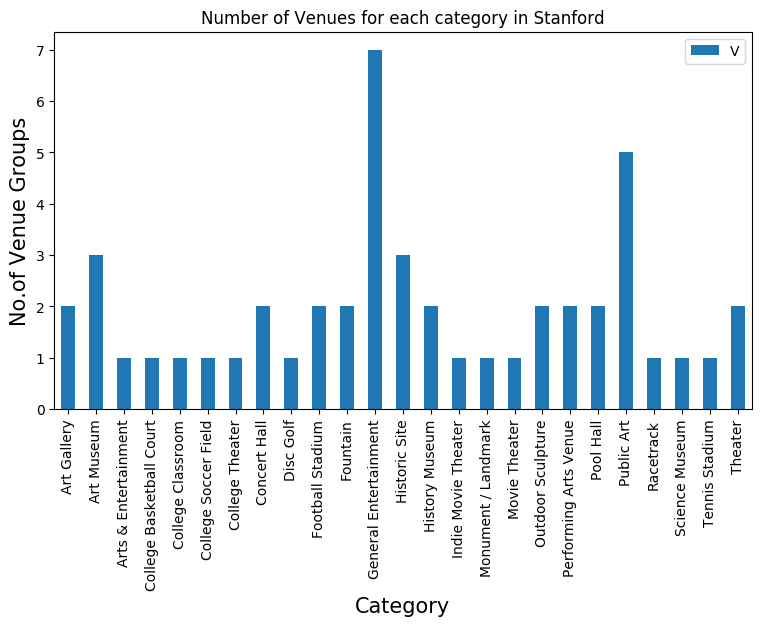

In [12]:
#Bar plot figure for categories
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Venues for each category in Stanford')
#On x-axis
plt.xlabel('Category', fontsize = 15)
#On y-axis
plt.ylabel('No.of Venue Groups', fontsize=15)
#giving a bar plot
st_uni.groupby('Category')['Name'].count().plot(kind='bar')
#legend
plt.legend('Venue Category')
#displays the plot
plt.show()

In [13]:
# one hot encoding
stanford_onehot = pd.get_dummies(st_uni[['Category']], prefix="", prefix_sep="")

# add name column back to dataframe
stanford_onehot['Name'] = st_uni['Name'] 

# move name column to the first column
fixed_columns = [stanford_onehot.columns[-1]] + list(stanford_onehot.columns[:-1])
stanford_onehot = stanford_onehot[fixed_columns]


stanford_onehot.head()

,Name,Art Gallery,Art Museum,Arts & Entertainment,College Basketball Court,College Classroom,College Soccer Field,College Theater,Concert Hall,Disc Golf,Football Stadium,Fountain,General Entertainment,Historic Site,History Museum,Indie Movie Theater,Monument / Landmark,Movie Theater,Outdoor Sculpture,Performing Arts Venue,Pool Hall,Public Art,Racetrack,Science Museum,Tennis Stadium,Theater
0,Hoover Tower,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Thomas Welton Stanford Art Gallery,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hoover Fountain,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Pigott Theater,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Hoover Archives,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# set number of clusters
kclusters = 5

stanford_onehot_clustering = stanford_onehot.drop('Name',1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(stanford_onehot_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]
stanford_onehot_clustering

,Art Gallery,Art Museum,Arts & Entertainment,College Basketball Court,College Classroom,College Soccer Field,College Theater,Concert Hall,Disc Golf,Football Stadium,Fountain,General Entertainment,Historic Site,History Museum,Indie Movie Theater,Monument / Landmark,Movie Theater,Outdoor Sculpture,Performing Arts Venue,Pool Hall,Public Art,Racetrack,Science Museum,Tennis Stadium,Theater
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#insert cluster labels to dataframe
stanford_onehot_clustering.insert(0, 'Cluster Labels', kmeans.labels_)


In [16]:
st_merged=st_uni
st_merged=st_merged.join(stanford_onehot_clustering)
st_merged.head()

,Category,Latitude,Longitude,Name,Nearby,Cluster Labels,Art Gallery,Art Museum,Arts & Entertainment,College Basketball Court,College Classroom,College Soccer Field,College Theater,Concert Hall,Disc Golf,Football Stadium,Fountain,General Entertainment,Historic Site,History Museum,Indie Movie Theater,Monument / Landmark,Movie Theater,Outdoor Sculpture,Performing Arts Venue,Pool Hall,Public Art,Racetrack,Science Museum,Tennis Stadium,Theater
0,Monument / Landmark,37.427937,-122.166895,Hoover Tower,Stanford University,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Art Gallery,37.428036,-122.167838,Thomas Welton Stanford Art Gallery,Stanford University,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fountain,37.428314,-122.166707,Hoover Fountain,Stanford University,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Theater,37.429050,-122.166703,Pigott Theater,Stanford University,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,History Museum,37.428452,-122.164310,Hoover Archives,Stanford University,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(st_merged['Latitude'], st_merged['Longitude'], st_merged['Name'], st_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [18]:
#apply cluster labels
st_merged.loc[st_merged['Cluster Labels'] == 0, st_merged.columns[[3] + list(range(5, st_merged.shape[1]))]]

,Name,Cluster Labels,Art Gallery,Art Museum,Arts & Entertainment,College Basketball Court,College Classroom,College Soccer Field,College Theater,Concert Hall,Disc Golf,Football Stadium,Fountain,General Entertainment,Historic Site,History Museum,Indie Movie Theater,Monument / Landmark,Movie Theater,Outdoor Sculpture,Performing Arts Venue,Pool Hall,Public Art,Racetrack,Science Museum,Tennis Stadium,Theater
0,Hoover Tower,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Thomas Welton Stanford Art Gallery,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hoover Fountain,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Pigott Theater,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Hoover Archives,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,Laurence Frost Amphitheater,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Bing Concert Hall,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Gates of Hell,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,The Claw,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Campbell Recital Hall,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
st_merged.loc[st_merged['Cluster Labels'] == 1, st_merged.columns[[3] + list(range(5, st_merged.shape[1]))]]

,Name,Cluster Labels,Art Gallery,Art Museum,Arts & Entertainment,College Basketball Court,College Classroom,College Soccer Field,College Theater,Concert Hall,Disc Golf,Football Stadium,Fountain,General Entertainment,Historic Site,History Museum,Indie Movie Theater,Monument / Landmark,Movie Theater,Outdoor Sculpture,Performing Arts Venue,Pool Hall,Public Art,Racetrack,Science Museum,Tennis Stadium,Theater
40,Anderson Collection,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44,Iris & B. Gerald Cantor Center for Visual Arts,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47,"london, england",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
st_merged.loc[st_merged['Cluster Labels'] == 2, st_merged.columns[[3] + list(range(5, st_merged.shape[1]))]]

,Name,Cluster Labels,Art Gallery,Art Museum,Arts & Entertainment,College Basketball Court,College Classroom,College Soccer Field,College Theater,Concert Hall,Disc Golf,Football Stadium,Fountain,General Entertainment,Historic Site,History Museum,Indie Movie Theater,Monument / Landmark,Movie Theater,Outdoor Sculpture,Performing Arts Venue,Pool Hall,Public Art,Racetrack,Science Museum,Tennis Stadium,Theater
19,DCI West,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
23,Ticketwood.com,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
28,Stanford Ticket Office,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
34,The Spillovers Band Room,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
36,Rice Alumni Baseball Tailgate,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
37,RyMo's Tailgate,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
42,Forever Young Zone,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
st_merged.loc[st_merged['Cluster Labels'] == 3, st_merged.columns[[3] + list(range(5, st_merged.shape[1]))]]

,Name,Cluster Labels,Art Gallery,Art Museum,Arts & Entertainment,College Basketball Court,College Classroom,College Soccer Field,College Theater,Concert Hall,Disc Golf,Football Stadium,Fountain,General Entertainment,Historic Site,History Museum,Indie Movie Theater,Monument / Landmark,Movie Theater,Outdoor Sculpture,Performing Arts Venue,Pool Hall,Public Art,Racetrack,Science Museum,Tennis Stadium,Theater
10,Google's 1st Storage Server (inspiración Neuro...,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
27,"""The Walk""",3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
39,Stanford Barn,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
st_merged.loc[st_merged['Cluster Labels'] == 4, st_merged.columns[[3] + list(range(5, st_merged.shape[1]))]]

,Name,Cluster Labels,Art Gallery,Art Museum,Arts & Entertainment,College Basketball Court,College Classroom,College Soccer Field,College Theater,Concert Hall,Disc Golf,Football Stadium,Fountain,General Entertainment,Historic Site,History Museum,Indie Movie Theater,Monument / Landmark,Movie Theater,Outdoor Sculpture,Performing Arts Venue,Pool Hall,Public Art,Racetrack,Science Museum,Tennis Stadium,Theater
13,Sieve Of Eratosthnes,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
14,Sequence by Richard Serra,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15,Labyrinth at Windhover,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
16,Monument to Change as It Changes,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
31,Flower Labyrinth,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [23]:
#apply whole same process for the Harvard University
address_har = 'Harvard University,Cambridge, MA, United States'
location_har = geolocator.geocode(address_har)
har_latitude = location_har.latitude
har_longitude = location_har.longitude
print('The geograpical coordinate of Harvard University are {}, {}.'.format(har_latitude, har_longitude))

The geograpical coordinate of Harvard University are 42.36782045, -71.1266665287448.


In [24]:
url_har = 'https://api.foursquare.com/v2/venues/search?categoryId=4d4b7104d754a06370d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    har_latitude, 
    har_longitude, 
    radius, 
    LIMIT)
url_har

'https://api.foursquare.com/v2/venues/search?categoryId=4d4b7104d754a06370d81259&client_id=2FJP1SNAS0EOUKRBQZTVF3UOYPVVKDL2OFVU5DRREJJYZVR1&client_secret=2WSG0NSRXEPO2K4SZREEUUCYLXWFMKYESTOVLSGCP0ZCFWCS&v=20180605&ll=42.36782045,-71.1266665287448&radius=1000&limit=100'

In [25]:
results_har = requests.get(url_har).json()
results_har

{'meta': {'code': 200, 'requestId': '5d99a5aad69ed0002c1ed87c'},
 'response': {'confident': True,
  'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/stadium_hockey_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d1b5941735',
      'name': 'College Hockey Rink',
      'pluralName': 'College Hockey Rinks',
      'primary': True,
      'shortName': 'Hockey'}],
    'hasPerk': False,
    'id': '4bca39f0fb84c9b683bd1c3e',
    'location': {'address': '79 N Harvard St',
     'cc': 'US',
     'city': 'Cambridge',
     'country': 'United States',
     'crossStreet': 'Harvard Athletic Complex',
     'distance': 39,
     'formattedAddress': ['79 N Harvard St (Harvard Athletic Complex)',
      'Cambridge, MA 02163',
      'United States'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 42.36807488929957,
       'lng': -71.12699337955992}],
     'lat': 42.36807488929957,
     'lng': -71.12699337955992,
     'neighborhood': 

In [26]:
har_data = results_har['response']
har_act=har_data['venues']
har_act

[{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/stadium_hockey_',
     'suffix': '.png'},
    'id': '4bf58dd8d48988d1b5941735',
    'name': 'College Hockey Rink',
    'pluralName': 'College Hockey Rinks',
    'primary': True,
    'shortName': 'Hockey'}],
  'hasPerk': False,
  'id': '4bca39f0fb84c9b683bd1c3e',
  'location': {'address': '79 N Harvard St',
   'cc': 'US',
   'city': 'Cambridge',
   'country': 'United States',
   'crossStreet': 'Harvard Athletic Complex',
   'distance': 39,
   'formattedAddress': ['79 N Harvard St (Harvard Athletic Complex)',
    'Cambridge, MA 02163',
    'United States'],
   'labeledLatLngs': [{'label': 'display',
     'lat': 42.36807488929957,
     'lng': -71.12699337955992}],
   'lat': 42.36807488929957,
   'lng': -71.12699337955992,
   'neighborhood': 'North Allston',
   'postalCode': '02163',
   'state': 'MA'},
  'name': 'Bright Hockey Center',
  'referralId': 'v-1570350506'},
 {'categories': [{'icon': {

In [0]:
har_uni=pd.DataFrame()

In [0]:
for data in har_act:
    name = data['name']
    lat=data['location']['lat']  
    lng=data['location']['lng']
    category=data['categories'][0]['name']
    
    
   
                   
    har_uni = har_uni.append({'Name': name,                                                     
                            'Latitude': lat,
                           'Longitude': lng,
                            'Category': category,
                              'Nearby': 'Harvard University' , 
                                             
                                }, ignore_index=True)

In [29]:
har_uni.head()

,Category,Latitude,Longitude,Name,Nearby
0,College Hockey Rink,42.368075,-71.126993,Bright Hockey Center,Harvard University
1,Tennis Stadium,42.369119,-71.128022,Beren Tennis Center (Harvard),Harvard University
2,Soccer Stadium,42.367913,-71.129925,Soldiers Field Soccer Stadium,Harvard University
3,General Entertainment,42.369510,-71.120072,Head Of The Charles - Weld Exhibition,Harvard University
4,General Entertainment,42.373427,-71.119510,"Dewey, Cheetham and Howe",Harvard University


In [30]:
har_uni.shape
#Harvard has 45 venues.

(45, 5)

In [31]:
map_harvard = folium.Map(location=[har_latitude, har_longitude], zoom_start=14)

for nm,ct,lat, lng in zip(har_uni['Name'], har_uni['Category'], har_uni['Latitude'], har_uni['Longitude']):
    label = '{}, {}'.format(nm,ct)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_harvard)  
    
map_harvard

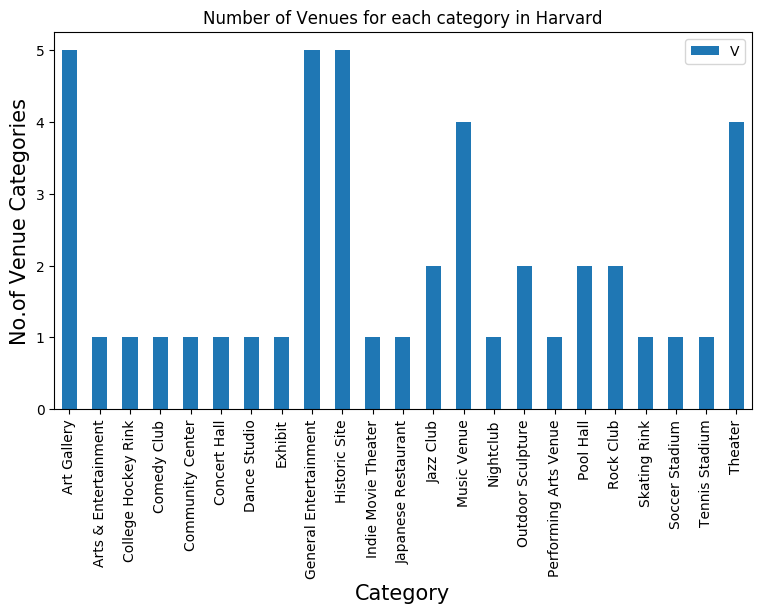

In [32]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Number of Venues for each category in Harvard')
plt.xlabel('Category', fontsize = 15)
plt.ylabel('No.of Venue Categories', fontsize=15)
har_uni.groupby('Category')['Name'].count().plot(kind='bar')
plt.legend('Venue Categories')
plt.show()

In [33]:
harvard_onehot = pd.get_dummies(har_uni[['Category']], prefix="", prefix_sep="")
harvard_onehot['Name'] = har_uni['Name'] 
fixed_columns = [harvard_onehot.columns[-1]] + list(harvard_onehot.columns[:-1])
harvard_onehot = harvard_onehot[fixed_columns]
harvard_onehot.head()

,Name,Art Gallery,Arts & Entertainment,College Hockey Rink,Comedy Club,Community Center,Concert Hall,Dance Studio,Exhibit,General Entertainment,Historic Site,Indie Movie Theater,Japanese Restaurant,Jazz Club,Music Venue,Nightclub,Outdoor Sculpture,Performing Arts Venue,Pool Hall,Rock Club,Skating Rink,Soccer Stadium,Tennis Stadium,Theater
0,Bright Hockey Center,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Beren Tennis Center (Harvard),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Soldiers Field Soccer Stadium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Head Of The Charles - Weld Exhibition,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Dewey, Cheetham and Howe",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
kclusters = 5
harvard_onehot_clustering = harvard_onehot.drop('Name',1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(harvard_onehot_clustering)
kmeans.labels_[0:10]
harvard_onehot_clustering

,Art Gallery,Arts & Entertainment,College Hockey Rink,Comedy Club,Community Center,Concert Hall,Dance Studio,Exhibit,General Entertainment,Historic Site,Indie Movie Theater,Japanese Restaurant,Jazz Club,Music Venue,Nightclub,Outdoor Sculpture,Performing Arts Venue,Pool Hall,Rock Club,Skating Rink,Soccer Stadium,Tennis Stadium,Theater
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
harvard_onehot_clustering.insert(0, 'Cluster Labels', kmeans.labels_)
har_merged=har_uni
har_merged=har_merged.join(stanford_onehot_clustering)
har_merged.head()

,Category,Latitude,Longitude,Name,Nearby,Cluster Labels,Art Gallery,Art Museum,Arts & Entertainment,College Basketball Court,College Classroom,College Soccer Field,College Theater,Concert Hall,Disc Golf,Football Stadium,Fountain,General Entertainment,Historic Site,History Museum,Indie Movie Theater,Monument / Landmark,Movie Theater,Outdoor Sculpture,Performing Arts Venue,Pool Hall,Public Art,Racetrack,Science Museum,Tennis Stadium,Theater
0,College Hockey Rink,42.368075,-71.126993,Bright Hockey Center,Harvard University,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Tennis Stadium,42.369119,-71.128022,Beren Tennis Center (Harvard),Harvard University,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Soccer Stadium,42.367913,-71.129925,Soldiers Field Soccer Stadium,Harvard University,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,General Entertainment,42.369510,-71.120072,Head Of The Charles - Weld Exhibition,Harvard University,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,General Entertainment,42.373427,-71.119510,"Dewey, Cheetham and Howe",Harvard University,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [36]:
h_map_clusters = folium.Map(location=[har_latitude, har_longitude], zoom_start=15)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(har_merged['Latitude'], har_merged['Longitude'], har_merged['Name'], har_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(h_map_clusters)
       
h_map_clusters

In [37]:
har_merged.loc[st_merged['Cluster Labels'] == 0, st_merged.columns[[3] + list(range(5, st_merged.shape[1]))]]

,Name,Cluster Labels,Art Gallery,Art Museum,Arts & Entertainment,College Basketball Court,College Classroom,College Soccer Field,College Theater,Concert Hall,Disc Golf,Football Stadium,Fountain,General Entertainment,Historic Site,History Museum,Indie Movie Theater,Monument / Landmark,Movie Theater,Outdoor Sculpture,Performing Arts Venue,Pool Hall,Public Art,Racetrack,Science Museum,Tennis Stadium,Theater
0,Bright Hockey Center,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Beren Tennis Center (Harvard),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Soldiers Field Soccer Stadium,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Head Of The Charles - Weld Exhibition,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,"Dewey, Cheetham and Howe",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,The Sinclair,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Loeb Drama Center (A.R.T),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Herter Amphitheatre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,The Washington Elm,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,The Hasty Pudding Club,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
har_merged.loc[st_merged['Cluster Labels'] == 1, st_merged.columns[[3] + list(range(5, st_merged.shape[1]))]]

,Name,Cluster Labels,Art Gallery,Art Museum,Arts & Entertainment,College Basketball Court,College Classroom,College Soccer Field,College Theater,Concert Hall,Disc Golf,Football Stadium,Fountain,General Entertainment,Historic Site,History Museum,Indie Movie Theater,Monument / Landmark,Movie Theater,Outdoor Sculpture,Performing Arts Venue,Pool Hall,Public Art,Racetrack,Science Museum,Tennis Stadium,Theater
40,Sammy Adams's Video Shoot,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44,Takemura Japanese Restaurant,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
har_merged.loc[st_merged['Cluster Labels'] == 2, st_merged.columns[[3] + list(range(5, st_merged.shape[1]))]]

,Name,Cluster Labels,Art Gallery,Art Museum,Arts & Entertainment,College Basketball Court,College Classroom,College Soccer Field,College Theater,Concert Hall,Disc Golf,Football Stadium,Fountain,General Entertainment,Historic Site,History Museum,Indie Movie Theater,Monument / Landmark,Movie Theater,Outdoor Sculpture,Performing Arts Venue,Pool Hall,Public Art,Racetrack,Science Museum,Tennis Stadium,Theater
19,Brattle Theatre,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
23,Cambridge Civil War Monument,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
28,Wu-Tang Wednesday @ Charlies Kitchen,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
34,Revels River Sing,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
36,Longfellow National Historic Site,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
37,Pierre Menard Gallery,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
42,Agassiz Theater,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
har_merged.loc[st_merged['Cluster Labels'] == 3, st_merged.columns[[3] + list(range(5, st_merged.shape[1]))]]

,Name,Cluster Labels,Art Gallery,Art Museum,Arts & Entertainment,College Basketball Court,College Classroom,College Soccer Field,College Theater,Concert Hall,Disc Golf,Football Stadium,Fountain,General Entertainment,Historic Site,History Museum,Indie Movie Theater,Monument / Landmark,Movie Theater,Outdoor Sculpture,Performing Arts Venue,Pool Hall,Public Art,Racetrack,Science Museum,Tennis Stadium,Theater
10,Outings and Innings,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
27,Oberon,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
39,Charly & Margay,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
har_merged.loc[st_merged['Cluster Labels'] == 4, st_merged.columns[[3] + list(range(5, st_merged.shape[1]))]]

,Name,Cluster Labels,Art Gallery,Art Museum,Arts & Entertainment,College Basketball Court,College Classroom,College Soccer Field,College Theater,Concert Hall,Disc Golf,Football Stadium,Fountain,General Entertainment,Historic Site,History Museum,Indie Movie Theater,Monument / Landmark,Movie Theater,Outdoor Sculpture,Performing Arts Venue,Pool Hall,Public Art,Racetrack,Science Museum,Tennis Stadium,Theater
13,Cambridge Artists Cooperative,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
14,Centennial Bell,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15,Car Talk Plaza,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
16,Spaceus,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
31,New College Theatre,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [42]:
#For comparison merge categories of dataframes
df1=pd.DataFrame(st_uni.groupby('Category')['Name'].count())
df2=pd.DataFrame(har_uni.groupby('Category')['Name'].count())

df = df1.merge(df2, right_index=True, left_index=True,
                                   how='outer').reset_index()
df

,Category,Name_x,Name_y
0,Art Gallery,2.0,5.0
1,Art Museum,3.0,NaN
2,Arts & Entertainment,1.0,1.0
3,College Basketball Court,1.0,NaN
4,College Classroom,1.0,NaN
5,College Hockey Rink,NaN,1.0
6,College Soccer Field,1.0,NaN
7,College Theater,1.0,NaN
8,Comedy Club,NaN,1.0
9,Community Center,NaN,1.0


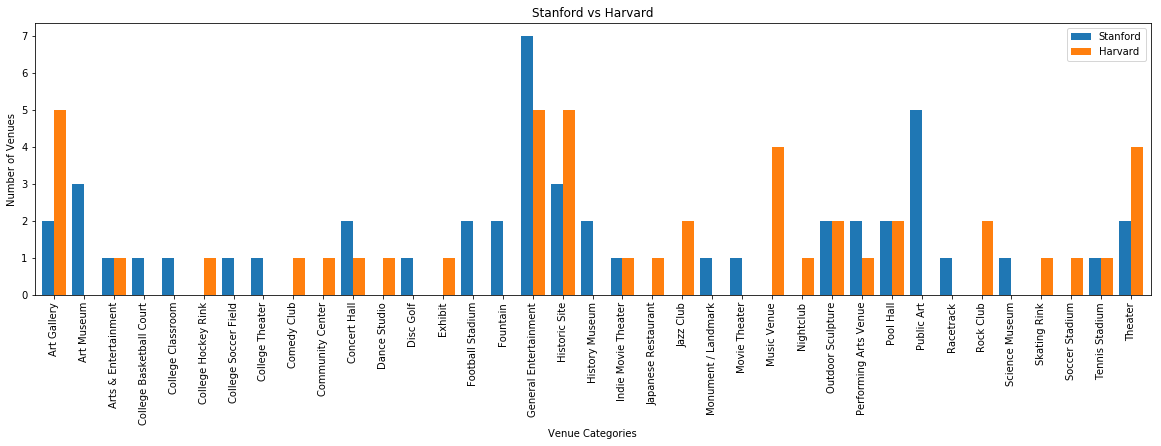

In [43]:
#Create groupped bar pilot figure
plt.rcParams["figure.figsize"] = [20,5]
ax=df.plot.bar(x = 'Category', y = ['Name_x', 'Name_y'],width=0.8)
ax.legend(["Stanford", "Harvard"])
plt.xlabel('Venue Categories')              
plt.ylabel('Number of Venues')
plt.title('Stanford vs Harvard')
plt.show()